# Exercise 7 - Fourier Transforms and Wavelet Transforms


### Introduction


In this exercise we will study two very versatile and useful transforms and see some examples of their uses in remote sensing using Python.

### How to use this jupyter notebook

The jupyter notebook is composed by a series of *cells*, each one containing either Python code or text instructions.
The text instruction that you are currently reading here are inside a text cell.

To run a cell, just click on it and then press the *Run* button at the top of the screen, or use the shortcut *Shift - Enter*.
You will not need to run *text cells*.
Only cells containing Python code need to be run, making sure that you are following a descending order: from the beginning of this jupyter notebook to its end. 
Since this Jupyter notebook runs online, you will not need to install anything on your personal computer.

If you prefer, and if you already have a Python installation, you can also download on your personal computer the notebook and the data from [here](https://github.com/alfonso-ferrone/exercise_7) and run it locally.
In this case, you will need to install the packages listed in *requirements.txt*, available in the same GitHub repository linked above.

You are not required to have prior Python knowledge.
All you will have to do is to modify the value of some quantities (or *variables*) to achieve the result requested by each section of the exercise.
You will need to interpret these results to answer the questions of the exercise.
However, if you want to experiment with the code provided, feel free to edit the code: the changes that you make will not overwrite the original copy of the notebook.
When logged in through EPFL's noto platform, your changes will be saved to your session.

Variables that will need to be modified will be preceeded by a comment, which clearly marks them as "to modify".
A comment is a line of code preceeded by the symbol *#*.
For example:

    # This is a comment

A variable that you will be required to modify will look like the following example:
    
    # Modify the value of the following variable
    VARIABLE_TO_MODIFY = 2

Naturally, in each case the name of the variable will be different.
To highlight those variables, they will always be written in UPPERCASE.

To modify the variable, change the value after the = sign. For example:

    VARIABLE_TO_MODIFY = 3

will change the value of *VARAIBLE_TO_MODIFY* from *2* to *3*.

### Note memory consumption

Across the exercise, we provided several code cells that "reset" the notebook, clearing up some space.
In theory, those should be sufficient.
If you still encounter a high memory consumption, we suggest two approaches:
- Clear all current outputs by clicking on *Cell* -> *All output* -> *Clear*
- Re-start the kernel by clicking on *Kernel* -> *Restart & Clear output*.

In both cases, you will need to continue with the exercise from the cell that loads the libraries immediately precceding the part of the exercise you were working on.
By *loading the libraries* we mean the code cells containing lines of codes such as:

    import numpy as np
    import PIL.Image

### Handing in your report
When you hand in your report on Moodle, it should contain: 
- Your answers to the questions. Make sure that you explain your reasoning and justify your answers.
- When relevant for the question, include the corresponding figure. Feel free to crop, annotate, circle, ... on the figure, if this helps in your explanations. There is **no need** to include all figures in the report, since many of them are purely for illustration purposes! Including them would unnecessarily overload your report.
- There is **no need** to upload your jupyter notebook.


#### Start the exercise by running the next cell: it will import the libraries needed for the exercise.

In [1]:
import numpy as np               # Array manipulation
import PIL.Image                 # Manipulation of images
import matplotlib.pyplot as plt  # Plotting
plt.rcParams['font.size'] = 15

## 1. 2D Fourier transform and global enhancement

The Fourier transform decomposes a signal into its main constituting frequencies and besides the rich additional information it gives about the signal, it is also a very convenient tool for signal filtering and processing.
This section shows some properties of the 2D Fourier transform as well as some examples of usage for remote sensing data, in particular satellite images.

### 1.1 Study of the 2D Fourier transform

In this exercice we will study the Fourier transform of an aerial image of La Chaux-de-Fonds (NE) (source: Google maps). This city in the Swiss Jura, close to the French border, has an interesting city plan. As the watchmaking industry developed in the late 18th and in the 19th century, the city expanded and buildings were constructed following a grid plan. While this is frequent in American cities, it is more rare in Europe.

We will then observe the effects of rotation and translation on the frequency spectrum.

Let us start by loading the image. Run the following cells: there is no need to modify anything for the moment, the code will already load and display the image for you.

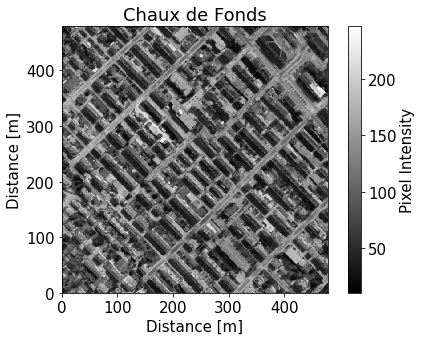

In [2]:
# Loading the image
cdf = np.array(PIL.Image.open("Data/1_Fourier/la_chaux_de_fonds.png"))

#  Resolution of a pixel
pix_res = 0.8 # m

# Computing x and y coordinates in meters
dim_x = cdf.shape[0]
dim_y = cdf.shape[1]
new_x = np.arange(0, dim_x) * pix_res
new_y = np.arange(0, dim_y) * pix_res

# Displaying the image
fig, ax = plt.subplots(1,1,figsize=(6.5,5))
ax.set_aspect('equal')
mappable = ax.pcolormesh(new_x, new_y, cdf.T, cmap='gray', shading='auto')
#ax.invert_yaxis()
plt.sca(ax)
plt.colorbar(mappable=mappable, label='Pixel Intensity')
ax.set_xlabel('Distance [m]')
ax.set_ylabel('Distance [m]')
ax.set_title('Chaux de Fonds')
plt.tight_layout()
plt.show()

Run the next cell to perform the Fourier transform of the image just loaded and visualize it.

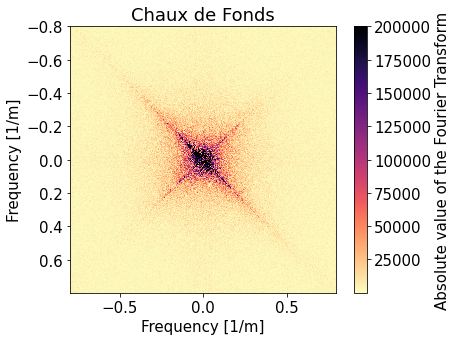

In [3]:
# Performing the Fourier transform
cdf_fft = np.fft.fft2(cdf)

#  Resolution of a pixel
pix_res = 1.6 # m

# Shifting the zero-frequency component to the center of the spectrum
cdf_fft_centered = np.fft.fftshift(cdf_fft)
dim_x = cdf_fft_centered.shape[1]
dim_y = cdf_fft_centered.shape[0]
new_x = np.arange(-np.floor(dim_x/2.), np.floor(dim_x/2.)) * pix_res / dim_x
new_y = np.arange(-np.floor(dim_y/2.), np.floor(dim_y/2.)) * pix_res / dim_y

# The absolute value of the array
cdf_fft_centered_real = np.absolute(cdf_fft_centered)

# Displaying the transform
fig, ax = plt.subplots(1,1,figsize=(6.5,5))
ax.set_aspect('equal')
ax.invert_yaxis()
colorbar_limit = 2e5 # This parameters limits the extent of the colorbar
import matplotlib.colors as colors
mappable = ax.pcolormesh(new_x,new_y, cdf_fft_centered_real, cmap='magma_r', 
                         vmin=1, vmax=colorbar_limit)#, norm=colors.LogNorm(),shading='auto')
plt.sca(ax)
plt.colorbar(mappable=mappable, label='Absolute value of the Fourier Transform')
ax.set_xlabel('Frequency [1/m]')
ax.set_ylabel('Frequency [1/m]')
ax.set_title('Chaux de Fonds')
plt.tight_layout()
plt.show()
fig.savefig('Figures/cdf_fourier',dpi=300,bbox_inches='tight')

##### Looking at both the original aerial image and its Fourier transform, you will be able to answer the first question of the exercise.


> **Question 1**: What are the axes with the dominant frequencies? To which features do they correspond in the image?


In the following cell we will load a copy of the original image, resized and translated.
Run it to perform its Fourier transform and visualize the results side by side with the input image.

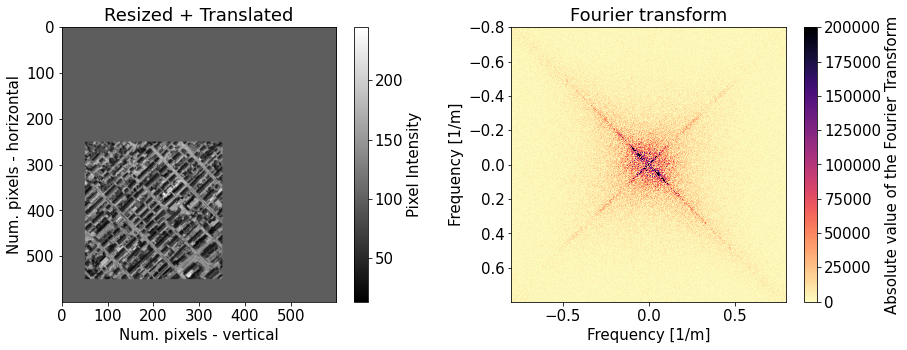

In [4]:
# Loading the image
cdf_translated = np.array(PIL.Image.open("Data/1_Fourier/la_chaux_de_fonds_scaled_translated.png"))

#  Resolution of a pixel
pix_res = 1.6 # m

# Performing the Fourier transform
cdf_translated_fft = np.fft.fft2(cdf_translated)

# Shifting the zero-frequency component to the center of the spectrum
cdf_translated_fft_centered = np.fft.fftshift(cdf_translated_fft)
dim_x = cdf_translated_fft_centered.shape[1]
dim_y = cdf_translated_fft_centered.shape[0]
new_x = np.arange(-np.floor(dim_x/2.), np.floor(dim_x/2.)) * pix_res / dim_x
new_y = np.arange(-np.floor(dim_y/2.), np.floor(dim_y/2.)) * pix_res / dim_y

# The absolute value of the array
cdf_translated_fft_centered_real = np.absolute(cdf_translated_fft_centered)

# Plotting the results and the aerial image
fig, axes = plt.subplots(1,2,figsize=(13,5))

ax0 = axes[0]
mappable0 = ax0.imshow(cdf_translated, cmap='gray')
plt.sca(ax0)
plt.colorbar(mappable=mappable0, label='Pixel Intensity')
ax0.set_xlabel('Num. pixels - vertical')
ax0.set_ylabel('Num. pixels - horizontal')
ax0.set_title('Resized + Translated')

ax1 = axes[1]
ax1.set_aspect('equal')
ax1.invert_yaxis()
colorbar_limit = 2.e5 # This parameters limits the extent of the colorbar
mappable = ax1.pcolormesh(new_x, new_y, cdf_translated_fft_centered_real, cmap='magma_r',
                         vmin=0., vmax=colorbar_limit, shading='auto')
plt.sca(ax1)
plt.colorbar(mappable=mappable, label='Absolute value of the Fourier Transform')
ax1.set_xlabel('Frequency [1/m]')
ax1.set_ylabel('Frequency [1/m]')
ax1.set_title('Fourier transform')

plt.tight_layout()
plt.show()
fig.savefig('Figures/cdf_fourier_resized_translated.png',dpi=300,bbox_inches='tight')

We repeat the operation once again for an image that has also been rotated of 20° (other than being resized and translated).
Run the following cell to perform its Fourier transform and visualize the results side by side with the input image.

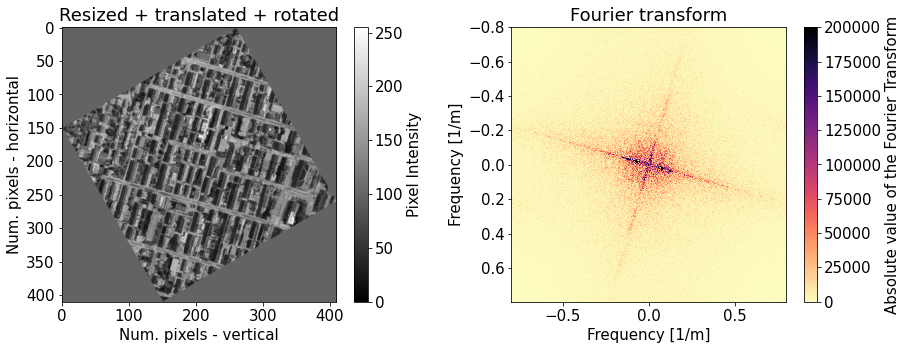

In [5]:
# Loading the image
cdf_rotated = np.array(PIL.Image.open("Data/1_Fourier/la_chaux_de_fonds_scaled_rotated.png"))

#  Resolution of a pixel
pix_res = 1.6 # m

# Performing the Fourier transform
cdf_rotated_fft = np.fft.fft2(cdf_rotated)

# Shifting the zero-frequency component to the center of the spectrum
cdf_rotated_fft_centered = np.fft.fftshift(cdf_rotated_fft)
dim_x = cdf_rotated_fft_centered.shape[1]
dim_y = cdf_rotated_fft_centered.shape[0]
new_x = np.arange(-np.floor(dim_x/2.), np.floor(dim_x/2.)) * pix_res / dim_x
new_y = np.arange(-np.floor(dim_y/2.), np.floor(dim_y/2.)) * pix_res / dim_y

# The absolute value of the array
cdf_rotated_fft_centered_real = np.absolute(cdf_rotated_fft_centered)

# Plotting the results and the aerial image
fig, axes = plt.subplots(1,2,figsize=(13,5))

ax0 = axes[0]
mappable0 = ax0.imshow(cdf_rotated, cmap='gray')
plt.sca(ax0)
plt.colorbar(mappable=mappable0, label='Pixel Intensity')
ax0.set_xlabel('Num. pixels - vertical')
ax0.set_ylabel('Num. pixels - horizontal')
ax0.set_title('Resized + translated + rotated')

ax1 = axes[1]
ax1.set_aspect('equal')
colorbar_limit = 2.e5 # This parameters limits the extent of the colorbar
mappable = ax1.pcolormesh(new_x, new_y, cdf_rotated_fft_centered_real, cmap='magma_r',
                         vmin=0, vmax=colorbar_limit, shading='auto')
plt.sca(ax1)
ax1.invert_yaxis()
plt.colorbar(mappable=mappable, label='Absolute value of the Fourier Transform')
ax1.set_xlabel('Frequency [1/m]')
ax1.set_ylabel('Frequency [1/m]')
ax1.set_title('Fourier transform')

plt.tight_layout()
plt.show()
fig.savefig('Figures/cdf_fourier_rotated.png',dpi=300,bbox_inches='tight')

Looking at the Fourier transform of:
- the original image
- the resized and translated image
- the rotated (and resized+translated) image

Compare the results and answer the following question.


> **Question 2**: Does the rotation affect the Fourier transform differently from the sole translation+resizing? Explain how each of them differ from the Fourier transform of the original aerial image.

We are now at the end of the subsection.
Let's clear up the workspace: run the next cell to remove all variables, and re-load the needed libraries.

In [6]:
# Let's clear up the workspace.
%reset -sf

# And re-loading the libraries
import numpy as np                     # Array manipulation
import PIL.Image                       # Manipulation of images
import matplotlib.pyplot as plt        # Plotting
from matplotlib.patches import Circle  # For drawing circles on the plots

### 1.2 Filtering in the frequency domain

In this exercise we will see how to perform a simple filtering operation on the Fourier transform.

We will perform the filtering on the Fourier transform results of the *la_chaux_de_fonds.png* image, obtained in Subsection 1.1.

First of all, we will define a simple function to perform the filtering.
This function takes the following arguments:
- **im_fft**, the Fourier transform of the image that we want to filter. The zero frequency must be at the center;
- **filter_type**, the type of filter, which can be either “lowpass” or “highpass”;
- **cut_freq**, the cutting frequency, which is specified in [1/m];
- **pix_res**, the pixel resolution in [m] (default 0.4 m).

Since the resolution of the image is approximately 0.4 meters, a frequency of 1/2 [1/m] corresponds to a frequency of 1 every 5 pixels for example.

In [7]:
def fft_filter(im_fft, filter_type, cut_freq, pix_res=1.6):
    '''
    Simple filtering on the Fourier transform.
    
    
    Parameters
    ----------
    im_fft : complex numpy array (2D)
        The Fourier transform of the image to filter.
    filter_type : string
        Type of filter, “lowpass” or “highpass”
    cut_freq : float
        Cutting frequency in [1/m]
    pix_res : float
        Pixel resolution in [m]
        
    Returns
    -------
    im_filt : complex numpy array (2D)
        The filtered image (complex array). Compute the absolute value before visualizing.
    filt_fft : complex numpy array (2D)
        The masked Fourier transform used to perform the filtering
    '''
    dim_x = im_fft.shape[1]
    dim_y = im_fft.shape[0]

    # Let' work with the 0 frequency at the center of the image
    new_x = np.fft.fftfreq(dim_x) * pix_res
    new_y = np.fft.fftfreq(dim_y) * pix_res

    x2d, y2d = np.meshgrid(new_x, new_y)
    freq = np.sqrt(np.square(x2d) + np.square(y2d))
    
    if filter_type == 'lowpass':
        freq_mask = freq < cut_freq
    elif filter_type == 'highpass':
        freq_mask = freq > cut_freq
    else:
        # In case of invalid input
        print('ERROR: Invalid parameter for filter type.')
        empty_return = np.full(im_fft.shape, np.nan)
        return empty_return, im_fft
    
    # The frequency masked
    filt_fft = np.multiply(im_fft, freq_mask)
    
    # Inverse Fourier transform
    im_filt_complex = np.fft.ifft2(np.fft.ifftshift(filt_fft))
    
    return im_filt_complex, filt_fft

We will first have a look at the effect of a low-pass filter on the original La Chaux-de-Fonds aerial image.
To do so, we have to apply the function defined in the previous cell to the Fourier transform of the image.

It will be interesting to observe what effect changing the cutting frequency will have on the filtered image.

**Here you will have to modify for the first time the value of a variable**

Run the following cell a first time as it is, to visualize the results, and then change the value of the variable: `CUTTING_FREQUENCY`


In [ ]:
# ------------------------------------------------------------------------
# Change the following variable, containing the cutting frequency in [1/m]
CUTTING_FREQUENCY = 0.7
# ------------------------------------------------------------------------

# Re-loading the image
cdf = np.array(PIL.Image.open("Data/1_Fourier/la_chaux_de_fonds.png"))
# Re-performing the Fourier transform
cdf_fft = np.fft.fft2(cdf)

#  Resolution of a pixel
pix_res = 1.6 # m

# Filtering the image
cdf_lowpass, cdf_lowpass_filt = fft_filter(cdf_fft, 'lowpass', CUTTING_FREQUENCY, pix_res)

# Shifting the zero-frequency component of the masked FFT to the center of the spectrum
cdf_lowpass_filt_centered = np.fft.fftshift(cdf_lowpass_filt)
dim_x = cdf_lowpass_filt_centered.shape[1]
dim_y = cdf_lowpass_filt_centered.shape[0]
new_x = np.arange(-np.floor(dim_x/2.), np.floor(dim_x/2.)) * pix_res / dim_x
new_y = np.arange(-np.floor(dim_y/2.), np.floor(dim_y/2.)) * pix_res / dim_y

# The absolute value of the array
cdf_lowpass_filt_centered_real = np.absolute(cdf_lowpass_filt_centered)

# The x and y axis for the plot of the filtered image
filt_x = np.arange(0, dim_x) * pix_res
filt_y = np.arange(0, dim_y) * pix_res

# Displaying the results
fig, axes = plt.subplots(1,2,figsize=(13,5))

ax0 = axes[0]
ax0.set_aspect('equal')
mappable = ax0.pcolormesh(filt_x, filt_y, np.absolute(cdf_lowpass), cmap='gray', shading='auto')
ax0.invert_yaxis()
plt.sca(ax0)
plt.colorbar(mappable=mappable, label='Pixel Intensity')
ax0.set_xlabel('Distance [m]')
ax0.set_ylabel('Distance [m]')
ax0.set_title('La Chaux-de-Fonds - low pass filter')

ax1 = axes[1]
ax1.set_aspect('equal')
ax1.invert_yaxis()
colorbar_limit = 2.e5 # This parameters limits the extent of the colorbar
mappable = ax1.pcolormesh(new_x, new_y, cdf_lowpass_filt_centered_real, cmap='magma_r',
                         vmin=0., vmax=colorbar_limit, shading='auto')
plt.sca(ax1)
plt.colorbar(mappable=mappable, label='Absolute value of the Fourier Transform')
# Adding a circle highlighting the filter
circle = Circle((0, 0), radius=CUTTING_FREQUENCY, facecolor='none',
                edgecolor='tab:green', linewidth=2, alpha=0.9, label='Cutting frequency')
ax1.add_patch(circle)
# Labels and legend
ax1.legend()
ax1.set_xlabel('Frequency [1/m]')
ax1.set_ylabel('Frequency [1/m]')
ax1.set_title('Fourier transform')

plt.tight_layout()
plt.show()

fig.savefig('Figures/la_chaux_de_fonds_fourier_lowpass',dpi=300,bbox_inches='tight')

By modifying the value of `CUTTING_FREQUENCY` in the previous cell, you can observe the effects of more and less restrictive low-pass filters on the image.
You are now ready to answer the next question of the exercise:

> **Question 3**: What is the effect of a low-pass filter on the image? What effect do the modification of `CUTTING_FREQUENCY` have on the final result?


We can now apply the high-pass filter to the image.
The procedure follows closely the one used for the low-pass filter.

Like before, run the following cell a first time as it is, to visualize the results, and then change the value of the variable:\
`CUTTING_FREQUENCY`

In [ ]:
# ------------------------------------------------------------------------
# Change the following variable, containing the cutting frequency in [1/m]
CUTTING_FREQUENCY = 0.7
# ------------------------------------------------------------------------

#  Resolution of a pixel
pix_res = 1.6 # m

# Filtering the image
cdf_highpass, cdf_highpass_filt = fft_filter(cdf_fft, 'highpass',
                                                             CUTTING_FREQUENCY, pix_res)

# Shifting the zero-frequency component of the masked FFT to the center of the spectrum
cdf_highpass_filt_centered = np.fft.fftshift(cdf_highpass_filt)
dim_x = cdf_highpass_filt_centered.shape[1]
dim_y = cdf_highpass_filt_centered.shape[0]
new_x = np.arange(-np.floor(dim_x/2.), np.floor(dim_x/2.)) * pix_res / dim_x
new_y = np.arange(-np.floor(dim_y/2.), np.floor(dim_y/2.)) * pix_res / dim_y

# The absolute value of the array
cdf_highpass_filt_centered_real = np.absolute(cdf_highpass_filt_centered)

# The x and y axis for the plot of the filtered image
filt_x = np.arange(0, dim_x) * pix_res
filt_y = np.arange(0, dim_y) * pix_res

# Displaying the results
fig, axes = plt.subplots(1,2,figsize=(13,5))

ax0 = axes[0]
ax0.set_aspect('equal')
ax0.invert_yaxis()
mappable = ax0.pcolormesh(filt_x, filt_y, np.absolute(cdf_highpass), cmap='gray', shading='auto')
plt.sca(ax0)
plt.colorbar(mappable=mappable, label='Pixel Intensity')
ax0.set_xlabel('Distance [m]')
ax0.set_ylabel('Distance [m]')
ax0.set_title('La Chaux-de-Fonds - high pass filter')

ax1 = axes[1]
ax1.set_aspect('equal')
ax1.invert_yaxis()
colorbar_limit = 2.e5 # This parameters limits the extent of the colorbar
mappable = ax1.pcolormesh(new_x, new_y, cdf_highpass_filt_centered_real, cmap='magma_r',
                         vmin=0., vmax=colorbar_limit, shading='auto')
plt.sca(ax1)
plt.colorbar(mappable=mappable, label='Absolute value of the Fourier Transform')
# Adding a circle highlighting the filter
circle = Circle((0, 0), radius=CUTTING_FREQUENCY, facecolor='none',
                edgecolor='tab:green', linewidth=2, alpha=0.9, label='Cutting frequency')
ax1.add_patch(circle)
# Labels and legend
ax1.legend()
ax1.set_xlabel('Frequency [1/m]')
ax1.set_ylabel('Frequency [1/m]')
ax1.set_title('Fourier transform')

plt.tight_layout()
plt.show()

fig.savefig('Figures/la_chaux_de_fonds_fourier_highpass',dpi=300,bbox_inches='tight')

Similarly to the low-pass case, by modifying the value of `CUTTING_FREQUENCY` in the previous cell you can observe the effects of more and less restrictive high-pass filters on the image.

> **Question 4**: What is the effect of a high-pass filter on the image? What effect does the modification of `CUTTING_FREQUENCY` have on the final result?

Now we will sum the images obtained from the low-pass and high-pass filters, with the same cutting frequency, in the previous two code cells.

**Attention**: Remember to run again the cell setting the same cutting frequency (variable: `CUTTING_FREQUENCY`) before running the next cell!

The result will be visualized side by side with the original La Chaux-de-Fonds image.

In [ ]:
# Summing low-pass and high-pass filter results
cdf_filter_sum = cdf_lowpass + cdf_highpass

# Displaying the results
fig, axes = plt.subplots(1,2,figsize=(14,6))

ax0 = axes[0]
ax0.set_aspect('equal')
ax0.invert_yaxis()
mappable0 = ax0.pcolormesh(filt_x, filt_y, cdf, cmap='gray', shading='auto')
plt.sca(ax0)
plt.colorbar(mappable=mappable0, label='Pixel Intensity',shrink=0.8)
ax0.set_xlabel('Distance [m]')
ax0.set_ylabel('Distance [m]')
ax0.set_title('La Chaux-de-Fonds - original')

ax1 = axes[1]
ax1.set_aspect('equal')
ax1.invert_yaxis()
mappable1 = ax1.pcolormesh(filt_x, filt_y, np.absolute(cdf_filter_sum), cmap='gray', shading='auto')
plt.sca(ax1)
plt.colorbar(mappable=mappable1, label='Pixel Intensity',shrink=.8)
ax1.set_xlabel('Distance [m]')
ax1.set_ylabel('Distance [m]')
ax1.set_title('Low-pass + high-pass filter results')

plt.tight_layout()
plt.show()
fig.savefig('Figures/cdf_highpass_lowpass.png',dpi=300,bbox_inches='tight')

Visually compare the original image and the one obtained from the sum of the low-pass and high-pass filter result.

> **Question 5**: What do you observe? If you look closely at the code, you will notice that we first summed the filtered images as *complex number*, and then took the *absolute value* of the result before displaying the image. Would we have obtained the same result if we summed directly the *absolute value* of the two filtered images? Explain the reasoning behind your answer.

We are now at the end of the Subsection.
Let's clear up the workspace: run the next cell to remove all variables, and re-load the needed libraries.

In [ ]:
# Let's clear up the workspace.
%reset -sf

# And re-loading the libraries
import numpy as np               # Array manipulation
import PIL.Image                 # Manipulation of images
import matplotlib.pyplot as plt  # Plotting
plt.rcParams['font.size']=15

### 1.3 Stripes on a Landsat image

On May 31, 2003 the Scan Line Corrector (SLC) in the Landsat 7 ETM+ instrument failed.
The SLC consists of a pair of small mirrors that rotate about an axis in tandem with the motion of the main ETM+ scan mirror. The purpose of the SLC is to compensate for the forward motion (along-track) of the spacecraft so that the resulting scans are aligned parallel to each other.
Without the effects of the SLC, the instrument images the Earth in a ”zig-zag”.
A consequence is that the scanned image is contaminated with black stripes.

We will now visualize an example of Landsat image affected by this issue.
The product chosen is the "LandsatLook Natural Color Image".
The image has been cropped and scaled to reduce its size and allow a faster manipulation.

In [ ]:
# Loading the image
landsat7_all = np.array(PIL.Image.open("Data/1_Fourier/landsat7.jpg"))

# Printing at screen the size of the image
print('Size of the image: ', landsat7_all.shape)

# Displaying the image
fig, ax = plt.subplots(1,1,figsize=(11,8))
mappable = ax.imshow(landsat7_all)
ax.set_xlabel('Num. pixels [-]')
ax.set_ylabel('Num. pixels [-]')
ax.set_title('Landsat 7 - LandsatLook Natural Color Image - 18/12/2003')
ax.set_aspect('equal')
plt.tight_layout()
plt.show()

To simplify the following analysis, we will focus now only on one of the components of the array in which the image is stored, the **green** (second) channel.

Repeating the procedure used in the previous sections on the aerial image of La Chaux-de-Fonds, we will compute the Fourier transform for the second component of the Landsat 7 image.

In [ ]:
# Loading the image
landsat7 = landsat7_all[:,:,1]#.mean(axis=-1)

#  Resolution of a pixel
# (Resolution of landsat7 multiplied by the factor used in scaling the image to reduce its size)
pix_res = 30. * 2. # m

# Performing the Fourier transform
landsat7_fft = np.fft.fft2(landsat7)

# Shifting the zero-frequency component to the center of the spectrum
landsat7_fft_centered = np.fft.fftshift(landsat7_fft)
dim_x = landsat7_fft_centered.shape[1]
dim_y = landsat7_fft_centered.shape[0]
new_x = np.arange(-np.floor(dim_x/2.), np.floor(dim_x/2.)) * pix_res / dim_x
new_y = np.arange(-np.floor(dim_y/2.), np.floor(dim_y/2.)) * pix_res / dim_y

# The x and y axis for the plot of the original Landsat7 image (in km)
orig_x = np.arange(0, dim_x) * pix_res / 1000
orig_y = np.arange(0, dim_y) * pix_res / 1000

# The absolute value of the array
landsat7_fft_centered_real = np.absolute(landsat7_fft_centered)

# Plotting the results and the Landsat image
fig, axes = plt.subplots(1,2,figsize=(16,5))

ax0 = axes[0]
ax0.set_aspect('equal')
ax0.invert_yaxis()
mappable0 = ax0.pcolormesh(orig_x, orig_y, landsat7, cmap='gray', shading='auto')
plt.sca(ax0)
plt.colorbar(mappable=mappable0, label='Pixel Intensity', shrink=0.8)
ax0.set_xlabel('Distance [km]')
ax0.set_ylabel('Distance [km]')
ax0.set_title('')

ax1 = axes[1]
ax1.set_aspect('equal')
ax1.invert_yaxis()
colorbar_limit = 2.e5 # This parameters limits the extent of the colorbar
mappable = ax1.pcolormesh(new_x, new_y, landsat7_fft_centered_real, cmap='magma_r',
                         vmin=0., vmax=colorbar_limit, shading='auto')
plt.sca(ax1)
plt.colorbar(mappable=mappable, label='Absolute value of the\n Fourier Transform',shrink=0.8)
ax1.set_xlabel('Frequency [1/m]')
ax1.set_ylabel('Frequency [1/m]')
ax1.set_title('Fourier transform')

plt.tight_layout()
plt.show()

Have a look at the original image and the magnitude of the Fourier transform.

> **Question 6**: Where do you see the signature of the stripes on the spectrum? Give an explanation.

We will now define a function, *pie_slice_filter*, that filters the 2D Fourier transform of the original image.
Like the simple low-pass and high-pass filters of Subsection 1.2, this function will take multiple arguments as input:
- **im_fft**, the Fourier transform of the image that we want to filter. The zero frequency must be at the center.;
- **angle_center**, the direction in which we will filter the Fourier transform. Must be between -180° and 180°;
- **angle_width**, the width in degrees of the slice that we will filter out;
- **min_freq**, the minimal frequency that is affected by the filter in [1/m];
- **pix_res**, the pixel resolution in [m] (in our case 60.0 m)

In [ ]:
def pie_slice_filter(im_fft, angle_center, angle_width, min_freq, pix_res=60.):
    '''
    Filtering specific angles of the Fourier transform.
    
    
    Parameters
    ----------
    im_fft : complex numpy array (2D)
        The Fourier transform of the image to filter. The zero frequency must be at the center.
    angle_center : float
        The direction in which we will filter the Fourier transform.
    angle_width : float
        The width in degrees of the slice that we will filter out;
    min_freq : float
        The minimal frequency that is affected by the filter [1/m]
    pix_res : float
        Pixel resolution in [m]
        
    Returns
    -------
    im_filt : complex numpy array (2D)
        The filtered image (complex array). Compute the absolute value before visualizing.
    filt_fft : complex numpy array (2D)
        The masked Fourier transform used to perform the filtering
    '''
    # Checking the validity of the angles (does not work for angles out of [-360, 360])
    if angle_center > 180.:
        angle_center -= 180
    elif angle_center < -180.:
        angle_center += 180
    
    # The image dimensions
    dim_x = im_fft.shape[1]
    dim_y = im_fft.shape[0]

    # Let' work with the 0 frequency at the center of the image
    new_x = np.arange(-np.floor(dim_x/2.), np.floor(dim_x/2.)) * pix_res / dim_x
    new_y = np.arange(-np.floor(dim_y/2.), np.floor(dim_y/2.)) * pix_res / dim_y
    
    x2d, y2d = np.meshgrid(new_x, new_y)
    freq = np.sqrt(np.square(x2d) + np.square(y2d))
    
    # Computing the angle for each direction in the image matrix
    img_angles = np.degrees(np.arctan2(x2d, y2d))

    # Creating the mask
    freq_mask = np.ones(im_fft.shape, dtype='bool')
    # 1) Condition on the angles
    # Direction 1
    min_freq_1 = angle_center - angle_width/2.
    max_freq_1 = angle_center + angle_width/2.

    cond_1 = np.logical_and(img_angles > min_freq_1, img_angles < max_freq_1)
    if min_freq_1 < -180.:
        cond_1 = np.logical_or(cond_1, img_angles > min_freq_1+360.)
    if max_freq_1 > 180.:
        cond_1 = np.logical_or(cond_1, img_angles < max_freq_1-360.)

    # Direction 1 + 180
    if angle_center > 0.:
        center2 = angle_center - 180.
    else:
        center2 = angle_center + 180.
    
    min_freq_2 = center2 - angle_width/2.
    max_freq_2 = center2 + angle_width/2.
    
    cond_2 = np.logical_and(img_angles > min_freq_2, img_angles < max_freq_2)
    if min_freq_2 < -180.:
        cond_2 = np.logical_or(cond_2, img_angles > min_freq_2+360.)
    if max_freq_2 > 180.:
        cond_2 = np.logical_or(cond_2, img_angles < max_freq_2-360.)

    cond = np.logical_or(cond_1, cond_2)
    freq_mask[cond] = False

    # 2) Condition on the minimum frequency
    freq_mask[freq < min_freq] = True
    
    # The frequency masked
    filt_fft = np.multiply(im_fft, freq_mask)
    
    # Inverse Fourier transform
    im_filt_complex = np.fft.ifft2(np.fft.ifftshift(filt_fft))
    
    return im_filt_complex, filt_fft

Since the 0° position of **angle_center** is arbitrary, we decided to set it along the positive section of the vertical axis. Angles clockwise from there will be negative (0° -> 180°), and angles counterclockwise from there will be positive.

If the explanation above is not clear enough, we wrote the following cell to displays the values of the angles on a matrix created ad hoc.
Run it to visualize which angle has been assigned to the directions in an arbitrary image.

In [ ]:
#  Generating the coordinate matrices
a = np.arange(-12, 12)
b = np.arange(-12, 12)
aa, bb = np.meshgrid(a,b)

# Plotting the angles
fig, ax = plt.subplots(1, 1, figsize=(4,3))
ax.set_aspect('equal')
mappable = ax.pcolormesh(aa, bb , -np.degrees(np.arctan2(aa, bb)), cmap='bwr')
ax.set_xticks([])
ax.set_yticks([])
plt.sca(ax)
plt.colorbar(mappable=mappable, label='Angle value [degree]')
ax.set_title('Explanation of the angle values')
plt.tight_layout()
plt.show()

We will now apply the *pie_slice_filter* function on the same Landsat7 band.

We provide already the code to perform the filtering, but the values of the parameters that we have set are not optimal.
The visualization of the result is already coded in the cell.

**You will have to modify three variables in the next cell**:
- `ANGLE_CENTER`
- `ANGLE_WIDTH`
- `MIN_FREQ`

Choose the values that you think work best in our case, the aim being the reconstruction of the image and the elimination (as much as possible) of the black stripes.

In [ ]:
# -----------------------------
# The three variables to modify
ANGLE_CENTER = 50.0
ANGLE_WIDTH = 30.0
MIN_FREQ = 1.5
# -----------------------------

#  Resolution of a pixel
pix_res = 30 # mand

# Filtering the image
landsat7_pie_slice, landsat7_pie_slice_filt_centered = pie_slice_filter(landsat7_fft_centered,
                                                                        ANGLE_CENTER,
                                                                        ANGLE_WIDTH,
                                                                        MIN_FREQ,
                                                                        pix_res)

# Shifting the zero-frequency component of the masked FFT to the center of the spectrum
# landsat7_pie_slice_filt_centered = np.fft.fftshift(landsat7_pie_slice_filt)
dim_x = landsat7_pie_slice_filt_centered.shape[1]
dim_y = landsat7_pie_slice_filt_centered.shape[0]
new_x = np.arange(-np.floor(dim_x/2.), np.floor(dim_x/2.)) * pix_res / dim_x
new_y = np.arange(-np.floor(dim_y/2.), np.floor(dim_y/2.)) * pix_res / dim_y

# The absolute value of the array
landsat7_pie_slice_filt_centered_real = np.absolute(landsat7_pie_slice_filt_centered)

# The x and y axis for the plot of the filtered image
filt_x = np.arange(0, dim_x) * pix_res
filt_y = np.arange(0, dim_y) * pix_res

# Displaying the results 
fig, axes = plt.subplots(1,2,figsize=(20,7))
ax0 = axes[0]
ax0.set_aspect('equal')
mappable = ax0.pcolormesh(filt_x/1000., filt_y/1000., np.absolute(landsat7_pie_slice),
                          cmap='gray', shading='auto')
ax0.invert_yaxis()
plt.sca(ax0)
plt.colorbar(mappable=mappable0, label='Pixel Intensity', shrink=0.62)
ax0.set_xlabel('Distance [Km]')
ax0.set_ylabel('Distance [Km]')
ax0.set_title('Landsat7 - after filtering')
plt.tight_layout()

ax1 = axes[1]
ax1.set_aspect('equal')
ax1.invert_yaxis()
colorbar_limit = 2.e5 # This parameters limits the extent of the colorbar
mappable = ax1.pcolormesh(new_x, new_y, landsat7_pie_slice_filt_centered_real, cmap='magma_r',
                         vmin=0., vmax=colorbar_limit, shading='auto')
plt.sca(ax1)
plt.colorbar(mappable=mappable, label='Absolute value of the Fourier Transform')
ax1.set_xlabel('Frequency [1/m]')
ax1.set_ylabel('Frequency [1/m]')
ax1.set_title('Filtered Fourier transform')
plt.grid()
plt.tight_layout()
plt.show()

After investigating the effect of changing the three variables in the prevous cell, you are ready to reply to the next question of the exercise.

> **Question 7**: What are, in your opinion, the best values for the three parameters (ANGLE_CENTER, ANGLE_WIDTH, MIN_FREQ)? Explain the reasoning behind your choice.

> **Question 8**: Even with the "optimal" set of values, the result is quite far from "perfect". What artefacts do you see? What areas are problematic?

In [ ]:
# Let's clear up the workspace.
%reset -sf

# And re-loading the libraries
import numpy as np               # Array manipulation
import PIL.Image                 # Manipulation of images
import matplotlib.pyplot as plt  # Plotting
plt.rcParams['font.size']=15

### 1.4 Global enhancement of LandSat image
We will now tackle another aspect of the LandSat image provided, i.e. its apparent darkness or underexposition (see the first figure in subsection 1.3). For this, we will implement the global enhancement method presented during class.

First, we load the image once again and plot the histograms of the red, green and blue bands.


In [ ]:
# Loading the image
landsat7_all = np.array(PIL.Image.open("Data/1_Fourier/landsat7.jpg"))

fig,axes = plt.subplots(1,3,figsize=(15,3),sharex=True,sharey=True)
bins = np.linspace(-5,255,60)
axes[0].hist(landsat7_all[:,:,0].flatten(),bins=bins,density=True,color='red',edgecolor='k')
axes[1].hist(landsat7_all[:,:,1].flatten(),bins=bins,density=True,color='green',alpha=.6,edgecolor='k')
axes[2].hist(landsat7_all[:,:,2].flatten(),bins=bins,density=True,color='blue',alpha=.5,edgecolor='k')
axes[0].grid()
axes[1].grid()
axes[2].grid()
plt.xlim(-10,255)
axes[0].set_title('Histogram Red band')
axes[1].set_title('Histogram Green band')
axes[2].set_title('Histogram Blue band')
axes[0].set_xlabel('Pixel value')
axes[1].set_xlabel('Pixel value')
axes[2].set_xlabel('Pixel value')
fig.savefig('Figures/Landsat7_histograms',dpi=300,bbox_inches='tight')

> **Question 9**: Briefly describe the histograms. Do these histograms confirm the dark appearance of the Landsat image to the eye? Can you identify signatures from certain features in the image? 

We now implement the equation given in the course slides for global enhancement through linear normalisation:

$DN_n = (DN_0 - DN_{0,min}) \frac{DN_{n,max} - DN_{n,min}}{DN_{0,max} - DN_{0,min}} + DN_{n,min}$

In the previous equation, $DN_0$ is the original landsat image. In the cell below, we define the corresponding variable accordingly (`DN0`).

In [ ]:
DN0 = landsat7_all.astype('float') #before performing the operations, we need to convert the array to floating point type

The following cell contains the implementation of the linear normalisation formula, and the visualization of the resulting enhanced image. 

Values of $DN_{0,min}$, $DN_{0,max}$, $DN_{n,max}$, $DN_{n,min}$, i.e. respectively `DN0MIN, DN0MAX, DNNMAX, DNNMIN` are set to arbitrary, meaningless values.\
You should now set them to their true values. Note: You can use basic python functions (e.g. sum, mean, min, max, ...), see https://numpy.org/doc/stable/reference/routines.statistics.html

> **Question 10**: What are the correct values for the following variables: $DN_{0,min}$, $DN_{0,max}$, $DN_{n,max}$, $DN_{n,min}$? Briefly explain your reasoning, and include the resulting enhanced image. What do you think of the result?



In [ ]:
# -----------------------------
# The four variables to modify
DN0MIN = -999 
DN0MAX = -999 
DNNMAX = -999 
DNNMIN = -999 
# -----------------------------

# The line below is the python implementation of the linear normalisation equation
landsat7_all_enhanced = (DN0-DN0MIN)*(DNNMAX-DNNMIN)/(DN0MAX-DN0MIN)+DNNMIN



#We now plot the enhanced image:
    
    # Finally we set the renormalized image to be of type integer again.
landsat7_all_enhanced = landsat7_all_enhanced.astype('int')

# Displaying the image
fig, ax = plt.subplots(1,1,figsize=(11,8))
mappable = ax.imshow(landsat7_all_enhanced)
ax.set_xlabel('Num. pixels [-]')
ax.set_ylabel('Num. pixels [-]')
ax.set_title('Landsat 7 - LandsatLook Natural Color Image - 18/12/2003 - ENHANCED')
ax.set_aspect('equal')
plt.tight_layout()
plt.show()
fig.savefig('Figures/Landsat7_with_stripes_enhanced',dpi=300,bbox_inches='tight')

We are now at the end of the first part of the exercise.
Let's clear up the workspace: run the next cell to remove all variables, and re-load the needed libraries.

In [ ]:
# Let's clear up the workspace.
%reset -sf

# We have to re-load the needed libraries
import numpy as np               # Array manipulation
import matplotlib.pyplot as plt  # Plotting
import pywt                      # Wavelets

## 2. Wavelet transforms

In this section we want to illustrate some uses of the discrete wavelet transforms for remote sensing data in particular satellite images.

The wavelet decomposition provides a way for analyzing signals both in frequency and time (or space for images), which unlike the Fourier transform makes them useful for analyzing both local and global features of the signal.
Wavelet transforms are stored more efficiently than Fourier transform opening new possibilities for signal compression.

In this exercise we will focus on the discrete wavelet transform, used for multiresolution analysis (Mallat 1989, https://doi.org/10.1109/34.192463).
The algorithm performing this transform employs two sets of functions, called scaling functions and wavelet functions, which are associated to lowpass and highpass filters, respectively.

The decomposition of the signal is obtained by successive highpass- and lowpass- filtering of the original signal.
The low-pass coefficients are called approximation coefficients and the high-pass coefficients are called details coefficients.

We will visualize an example in the next code cell: a two-level transform of 1D signal.

In [ ]:
# Loading the signal
signal = np.load("Data/2_Wavelets/signal.npy")

# First level
approximation1, detail1 = pywt.dwt(signal, 'db1')

# Second level
approximation2, detail2 = pywt.dwt(approximation1, 'db1')

'''
Note that most libraries provide "already made" multi-level decompositions.
For example, in Python (pywt), you could use:

pywt.wavedec(signal, 'db1', level=2)

to perform the two steps done separately (for clarity purposes) in this cell.
'''

# Visualizing:
# First level
fig, axes = plt.subplots(3,1, figsize=(8, 6))

ax0 = axes[0]
ax0.plot(signal, c='tab:red')
ax0.set_ylabel('Original signal')

ax1 = axes[1]
ax1.plot(approximation1, c='tab:blue')
ax1.set_ylabel('Approximation - lvl 1')

ax2 = axes[2]
ax2.plot(detail1, c='tab:green')
ax2.set_ylabel('Detail - lvl 1')

for ax in axes:
    ax.set_axisbelow(True)
    ax.grid(ls=':', color='gray', alpha=0.5)
plt.suptitle('Fig. 1: First level', weight='bold',y=1.01)
plt.tight_layout()


# Second level
fig, axes = plt.subplots(3,1, figsize=(8, 6))

ax0 = axes[0]
ax0.plot(approximation1, c='tab:orange')
ax0.set_ylabel('Approx. - lvl 1')

ax1 = axes[1]
ax1.plot(approximation2, c='tab:blue')
ax1.set_ylabel('Approx. - lvl 2')

ax2 = axes[2]
ax2.plot(detail2, c='tab:green')
ax2.set_ylabel('Detail - lvl 2')

for ax in axes:
    ax.set_axisbelow(True)
    ax.grid(ls=':', color='gray', alpha=0.5)
plt.suptitle('Fig. 2: Second level -\n using "Approximation lvl.1" as input', weight='bold',y=1.05)
plt.tight_layout()

plt.show()

In the example displayed above the red signal is the original signal.
The two-step procedure followed is:
- This signal is low-pass filtered with the filter corresponding to the scaling function to give the approximation coefficients at level 1 (blue curve), and high-pass filtered with the filter corresponding to the wavelet function to give the details coefficients at level 1 (green curve). **The approximation coefficients represents the low-frequency components and the details coefficients the high frequency components**. This is visible in the top three panels.
- The new level of the wavelet transform is computed, this time using not the original signal but the approximation coefficients of the previous level (level one, in orange, i.e. equal to the blue curve in the first figure). This gives a new set of approximation coefficients (blue curve) and detail coefficients (green curve) shown in the bottom three panels.

You can notice that the green curve in the top panel is more noisy than the green curve on the bottom one.
That is because the details at level 2 were obtained by high-pass filtering the approximation signal at level 1, which has fewer high-frequency components than the original signal.
This procedure can be repeated over and over to extend the transform to further levels. \
Note that after each step, the size of the approximation and detail coefficients it half that of the input signal: this "multiresolution" decomposition thus provides an analysis of the signal across scales.

Generally the approximation coefficients at intermediate levels are not stored, which means that for a transform of level N , the final output will be N signals of detail coefficients (at levels 1 to N) and one signal of approximation coefficients (at level N). This is sufficient for the reconstruction of the original signal. The wavelet transform is an invertible process and the original signal or image can be retrieved by applying the inverse wavelet transform, which is simply a mirrored version of the filters, to the approximation and details coefficients.

Note that there is a linear relation between frequency and wavelet level (the frequency decreases with the level).
The detail coefficients of the first level correspond to the highest frequencies of the signal.

In 2D the procedure is similar except that the high-pass filtering is done in three directions: horizontal, vertical and diagonal.
This means that for a transform of level 1, instead of just one signal of details coefficient and one signal of approximation coefficients as in the 1D case, you will get three images of details coefficients (hor., ver. and diag. directions) and one image of approximation coefficient.



Let's clear up the workspace after this example: run the next cell to remove all variables, and re-load the needed libraries.

In [ ]:
# Let's clear up the workspace.
%reset -sf

# We have to re-load the needed libraries
import numpy as np               # Array manipulation
import PIL.Image                 # Manipulation of images
import matplotlib.pyplot as plt  # Plotting
import pywt                      # Wavelets

# For the 2D wavelet transform we will load directly the needed functions
from pywt._doc_utils import wavedec2_keys, draw_2d_wp_basis

### 2.1 Wavelet multiresolution analysis in 2D

We will now look at a practical example of multi-resolution analysis for satellite imagery, using an aerial image of EPFL campus (source: Google maps). \
Run the following cell to load the grayscale image.


In [ ]:
# Loading the of the aerial image
aer_img = np.array(PIL.Image.open("Data/2_Wavelets/epfl_campus_grayscale.png"))

print('Image size in pixel: ', aer_img.shape)

pix_res = 844/800 # determined from Swissmap (map.geo.admin.ch)

# Computing x and y coordinates in pixels
dim_x = aer_img.shape[1]
dim_y = aer_img.shape[0]
new_x = np.arange(0, dim_x)*pix_res
new_y = np.arange(0, dim_y)*pix_res

# Displaying the image
fig, ax = plt.subplots(1,1,figsize=(7,5))
ax.set_aspect('equal')
mappable = ax.pcolormesh(new_x,new_y,aer_img, cmap='gray', shading='auto')
ax.invert_yaxis()
plt.sca(ax)
plt.colorbar(mappable=mappable, label='Pixel Intensity')
ax.set_xlabel('Distance [m]')
ax.set_ylabel('Distance [m]')
ax.set_title('Original aerial image')
plt.tight_layout()

And run the following cell to perform the decomposition. The wavelet used is "Daubechies type 1" (`'db1'`) but other types could be used. We will not investigate here the influence of the type of wavelet chosen on the results.

In [ ]:
# The image shape
shape = aer_img.shape

# how many levels of decomposition to draw
max_lev = 2

# how many levels to explicitly label on the plots
label_levels = max_lev

# Choosing a colormap (to see details better even though the image is still in "black and white")
cmap = plt.cm.magma

fig, axes = plt.subplots(2, max_lev+1, figsize=[15, 11])
for level in range(0, max_lev + 1):
    if level == 0:
        # show the original image before decomposition
        axes[0, 0].set_axis_off()
        axes[1, 0].imshow(aer_img, cmap=cmap)
        axes[1, 0].set_title('Original image')
        axes[1, 0].set_axis_off()
        continue

    # plot subband boundaries of a standard DWT basis
    draw_2d_wp_basis(shape, wavedec2_keys(level), ax=axes[0, level],
                     label_levels=label_levels)
    
    axes[0, level].set_title('{} level\ndecomposition'.format(level))

    # compute the 2D DWT
    c = pywt.wavedec2(aer_img, 'db1', mode='periodization', level=level)
    
    # normalize/increase each coefficient array independently for better visibility
    c[0] /= np.abs(c[0]).max()
    for detail_level in range(level):
        enhanced_d_list = []
        for d in c[detail_level + 1]:
            nomr_d = d/np.abs(d).max()
            increased_d = 20. * nomr_d
            increased_d[increased_d > 1] = 1
            increased_d[increased_d < -1] = -1
            enhanced_d_list.append(increased_d)
        c[detail_level + 1] = enhanced_d_list
        
    # show the normalized coefficients
    arr, slices = pywt.coeffs_to_array(c)
    
    axes[1, level].imshow(arr, cmap=cmap)
    
    for l in range(1,level+1):
        axes[1,level].plot([len(arr)/(2**l),len(arr)/(2**l)-1],[1, len(arr)/(2**(l-1))-1],'k')
        axes[1,level].plot([1, len(arr)/(2**(l-1))-1],[len(arr)/(2**l),len(arr)/(2**l)-1],'k')    
    
    axes[1, level].set_title('Coefficients\n({} level)'.format(level))
    axes[1, level].set_axis_off()
    
for ax in axes.flatten():
    ax.set_aspect('equal')
plt.tight_layout()
plt.show()

fig.savefig('Figures/wavelet_decomposition',dpi=300,bbox_inches='tight')

In the plots produced by the previous cell, the top row indicates the coefficient names: **v** correspond to vertical details, **h** to horizontal details and **d** to diagonal details.
Note that for subsequent levels of decomposition (level 2 onwards), only the approximation coefficients (the lowpass subband) are further decomposed, from there the **a** label in the top-left quadrant.

Take a look at the different decompositions and answer the following question:

> **Question 9**: When looking carefully, we can notice that different details of the original image correspond to different features in the coefficient panels. Provide at least one feature of the original image whose signal is clearly visible in the *horizontal* component, but almost absent in the vertical one. Identify a second feature in the original image whose signal is clearly visible in the *vertical* component, but less marked in the horizontal one. \
Either describe precisely the position of each feature, or annotate the figure in your report.

Let's clear up the workspace after this subsection. Run the next cell to remove all variables, and re-load the needed libraries.

In [ ]:
# Let's clear up the workspace.
%reset -sf

# We have to re-load the needed libraries
import numpy as np               # Array manipulation
import PIL.Image                 # Manipulation of images
import matplotlib.pyplot as plt  # Plotting
import skimage.restoration       # Wavelets denoising
from matplotlib.patches import Circle  # For drawing circles on the plots
import pywt


### 2.2 Wavelet denoising

Denoising is an import application of wavelets, particularly relevant to imaging and remote sensing applications.

The goal of image denoising is to remove noise as much as possible while preserving the features of the image.
The multi-resolution analysis performed by the wavelet transform is a very powerful technique to reach this goal.
In the wavelet domain, most image information is contained in 1) the approximation coefficients and 2) the largest wavelet detail coefficients, while the noise typically corresponds to detail coefficients with small absolute values.

As in wavelet compression, the usual approach to wavelet denoising consists in thresholding the wavelet (detail) coefficients. The thresholds are generally chosen using different estimators that rely on the estimation of the noise variance.

Two approaches exist:
- **Hard thresholding**, which can be described as the usual process of setting to zero the elements whose absolute values are lower than the threshold;
- **Soft thresholding**, which is an extension of hard thresholding, first setting to zero the elements whose absolute values are lower than the threshold, and then shrinking the nonzero coefficients towards 0.

The following cell produces a figure illustrating hard and soft thresholding.


In [ ]:
# The following lines of code are inspired from https://pywavelets.readthedocs.io/en/latest/ref/thresholding-functions.html
s = np.linspace(-3, 3, 1000)
s_soft = pywt.threshold(s, value=0.5, mode='soft')
s_hard = pywt.threshold(s, value=0.5, mode='hard')
s_firm1 = pywt.threshold_firm(s, value_low=0.5, value_high=1)
s_firm2 = pywt.threshold_firm(s, value_low=0.5, value_high=2)
s_firm3 = pywt.threshold_firm(s, value_low=0.5, value_high=4)

fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(s, s_soft)
ax.plot(s, s_hard)
ax.legend(['soft (thres=0.5)', 'hard (thres=0.5)'],loc='upper left',bbox_to_anchor=(1,1))
ax.set_xlabel('input value')
ax.set_ylabel('thresholded value')
ax.grid()

In this exercise we will study the performance of wavelet denoising on three types of noise.

- **Gaussian white noise**: Gaussian white noise is noise generated by a gaussian distribution with zero mean and a given variance (which can be related to the intensity of the noise).
- **Speckle noise**: Speckle noise is an additive noise, i.e. its intensity is proportional on the intensity of the signal. It is inherently associated with active radar. Speckle is a granular ’noise’ that inherently exists in and degrades the quality of the active radar, synthetic aperture radar (SAR), and medical ultrasound images and is caused by interference of reflected electromagnetic waves by a rough surface.
- **Salt and pepper noise**: Salt and pepper noise is a form of noise caused by malfunctioning pixels in camera sensors, faulty memory locations in hardware or noisy transmissions. In the corrupted image, noisy pixels can take only the maximum or the minimum value (resp. black or white).

Let's generate artificially some noise to apply to the aerial image that we analyzed in the previous section.

In [ ]:
# Re-loading the of the aerial image
aer_img = np.array(PIL.Image.open("Data/2_Wavelets/epfl_campus_grayscale.png"))[:800,:800]/255# between 0 and 1
print(aer_img.shape)
#  Resolution of a pixel
pix_res = 844/800 # determined from Swissmap (map.geo.admin.ch)

# Axis in [m]
dim_x = aer_img.shape[1]
dim_y = aer_img.shape[0]
new_x = np.arange(0, dim_x) * pix_res
new_y = np.arange(0, dim_y) * pix_res

aer_img_noisy = {}
# Gaussian noise
gaussian_var = 0.01 # Variance of noise
aer_img_noisy['gaussian'] = skimage.util.random_noise(aer_img, mode='gaussian', seed=1234, var=gaussian_var)

# Speckle noise
speckle_var = 0.15  # Variance of noise
aer_img_noisy['speckle'] = skimage.util.random_noise(aer_img, mode='speckle', seed=1234, var=speckle_var)

# Salt & Pepper noise
sp_density = 0.02 # Proportion of image pixels to replace with noise 
aer_img_noisy['salt_pepper'] = skimage.util.random_noise(aer_img, mode='s&p', seed=1234, amount=sp_density)

# Visualizing all images
fig, axes = plt.subplots(2, 2, figsize=(14,11))

for ax in axes.flatten():
    ax.set_aspect('equal')

ax0 = axes[0, 0]
mappable = ax0.pcolormesh(new_x, new_y, aer_img, cmap='gray', shading='auto', vmin=0., vmax=1.)
plt.sca(ax0)
plt.colorbar(mappable=mappable, label='Pixel intensity')
ax0.invert_yaxis()
ax0.set_title('Original')
ax0.set_ylabel('Distance [m]')

ax1 = axes[0, 1]
mappable = ax1.pcolormesh(new_x, new_y, aer_img_noisy['gaussian'], cmap='gray', shading='auto', vmin=0., vmax=1.)
plt.sca(ax1)
plt.colorbar(mappable=mappable, label='Pixel intensity')
ax1.invert_yaxis()
ax1.set_title('Gaussian noise')

ax2 = axes[1, 0]
mappable = ax2.pcolormesh(new_x, new_y, aer_img_noisy['speckle'], cmap='gray', shading='auto', vmin=0., vmax=1.)
plt.sca(ax2)
plt.colorbar(mappable=mappable, label='Pixel intensity')
ax2.invert_yaxis()
ax2.set_title('Speckle noise')
ax2.set_xlabel('Distance [m]')
ax2.set_ylabel('Distance [m]')

ax3 = axes[1, 1]
mappable = ax3.pcolormesh(new_x, new_y, aer_img_noisy['salt_pepper'], cmap='gray', shading='auto', vmin=0., vmax=1.)
plt.sca(ax3)
plt.colorbar(mappable=mappable, label='Pixel intensity')
ax3.invert_yaxis()
ax3.set_title('Salt and pepper noise')
ax3.set_xlabel('Distance [m]')

plt.tight_layout()
plt.show()

The following code cell performs the de-noising. \
The procedure starts by estimating the standard deviation of the noise. This is used by the algorithm to determine the threshold value to be used.\
Once the estimate is ready, the hard and soft thresholding are applied.

In [ ]:
denoised_soft_img = {}
denoised_hard_img = {}
for noise_type in ['gaussian', 'salt_pepper','speckle']:
    # Estimating the standard deviation "sigma" of the noise
    sigma_est = skimage.restoration.estimate_sigma(aer_img_noisy[noise_type], multichannel=False)

    # Soft thresholding
    denoised_soft_img[noise_type] = skimage.restoration.denoise_wavelet(aer_img_noisy[noise_type],
                                                                     sigma=sigma_est,
                                                                     wavelet='db1',
                                                                     mode='soft',
                                                                     multichannel=False,
                                                                     rescale_sigma=True)
    # Hard thresholding
    denoised_hard_img[noise_type] = skimage.restoration.denoise_wavelet(aer_img_noisy[noise_type],
                                                                     sigma=sigma_est,
                                                                     wavelet='db1',
                                                                     mode='hard',
                                                                     multichannel=False,
                                                                     rescale_sigma=True)
    
    

To visualize the results for each type of noise, **set the value of NOISE_TYPE and run the cell**. \
Two figures are created: the first one with the views of the entire campus, and the second one with a zoom on the Rolex center, in order to visualize smaller-scale structures.

In [ ]:
# ------------------------------------------------------------------------
# Change the following variable, defining the type of noise (this will select the noisy image defined before)

NOISE_TYPE = 'gaussian' # should be either 'gaussian', 'salt_pepper' or 'speckle'

# ------------------------------------------------------------------------


# Visualizing results
fig, axes = plt.subplots(2, 2, figsize=(14,12))

for ax in axes.flatten():
    ax.set_aspect('equal')

ax0 = axes[0, 0]
mappable = ax0.pcolormesh(new_x, new_y, aer_img, cmap='gray', shading='auto', vmin=0., vmax=1.)
plt.sca(ax0)
plt.colorbar(mappable=mappable, label='Pixel intensity')
ax0.invert_yaxis()
ax0.set_title('Original')
ax0.set_ylabel('Distance [m]')

ax1 = axes[0, 1]
mappable = ax1.pcolormesh(new_x, new_y, aer_img_noisy[NOISE_TYPE], cmap='gray', shading='auto', vmin=0., vmax=1.)
plt.sca(ax1)
plt.colorbar(mappable=mappable, label='Pixel intensity')
ax1.invert_yaxis()
ax1.set_title('%s noise'%NOISE_TYPE)

ax2 = axes[1, 0]
mappable = ax2.pcolormesh(new_x, new_y, denoised_soft_img[NOISE_TYPE], cmap='gray', shading='auto', vmin=0., vmax=1.)
plt.sca(ax2)
plt.colorbar(mappable=mappable, label='Pixel intensity')
ax2.invert_yaxis()
ax2.set_title('Denoised - soft')
ax2.set_xlabel('Distance [m]')
ax2.set_ylabel('Distance [m]')

ax3 = axes[1, 1]
mappable = ax3.pcolormesh(new_x, new_y, denoised_hard_img[NOISE_TYPE], cmap='gray', shading='auto', vmin=0., vmax=1.)
plt.sca(ax3)
plt.colorbar(mappable=mappable, label='Pixel intensity')
ax3.invert_yaxis()
ax3.set_title('Denoised - hard')
ax3.set_xlabel('Distance [m]')

plt.tight_layout()
plt.suptitle('Full EPFL campus', y = 1.02)
plt.show()

fig.savefig('Figures/wavelet_denoising_full_image_%s'%NOISE_TYPE, dpi=300, bbox_inches='tight')
#######################################################################################################3333

fig, axes = plt.subplots(2, 2, figsize=(14,10))

for ax in axes.flatten():
    ax.set_aspect('equal')

ax0 = axes[0, 0]
mappable = ax0.pcolormesh(new_x, new_y, aer_img, cmap='gray', shading='auto', vmin=0., vmax=1.)
plt.sca(ax0)
plt.colorbar(mappable=mappable, label='Pixel intensity')
ax0.invert_yaxis()
ax0.set_title('Original')
ax0.set_ylabel('Distance [m]')

ax1 = axes[0, 1]
mappable = ax1.pcolormesh(new_x, new_y, aer_img_noisy[NOISE_TYPE], cmap='gray', shading='auto', vmin=0., vmax=1.)
plt.sca(ax1)
plt.colorbar(mappable=mappable, label='Pixel intensity')
ax1.invert_yaxis()
ax1.set_title('%s noise'%NOISE_TYPE)

ax2 = axes[1, 0]
mappable = ax2.pcolormesh(new_x, new_y, denoised_soft_img[NOISE_TYPE], cmap='gray', shading='auto', vmin=0., vmax=1.)
plt.sca(ax2)
plt.colorbar(mappable=mappable, label='Pixel intensity')
ax2.invert_yaxis()
ax2.set_title('Denoised - soft')
ax2.set_xlabel('Distance [m]')
ax2.set_ylabel('Distance [m]')

ax3 = axes[1, 1]
mappable = ax3.pcolormesh(new_x, new_y, denoised_hard_img[NOISE_TYPE], cmap='gray', shading='auto', vmin=0., vmax=1.)
plt.sca(ax3)
plt.colorbar(mappable=mappable, label='Pixel intensity')
ax3.invert_yaxis()
ax3.set_title('Denoised - hard')
ax3.set_xlabel('Distance [m]')

plt.tight_layout()

for ax in axes.flatten():
    ax.set_xlim(500,750)
    ax.set_ylim(500,700)
    
plt.suptitle('Zoom on Rolex center',y=1.02)

fig.savefig('Figures/wavelet_denoising_zoom_%s'%NOISE_TYPE, dpi=300, bbox_inches='tight')

First, look at the result for the gaussian noise (setting `NOISE_TYPE = 'gaussian'` in the previous cell). Compare the denoising output to the noisy and the original image.

> **Question 10**: What are the improvement and drawbacks visible in the results? What differences do you observe between the results of the *hard* and *soft* thresholding?

Now, observe the denoising results for the *salt and pepper noise* case. (`NOISE_TYPE = 'salt_pepper'`) 
            

> **Question 11**: Does the denoising perform in this case equally well as in the Gaussian case? Can you explain why? Do you see significant differences in the performances of the soft and hard thresholding?

Finally, repeat the procedure for the *speckle* noise.

> **Question 12**: Similar to the previous question, describe the output. Does the denoising perform as well as in the Gaussian case? Do you see significant differences in the soft and hard thresholding?

### 2.2 Wavelet vs. Fourier denoising
We now want to compare the two denoising methods that were implemented in this exercise (Fourier and wavelet transforms). We use the same data as for the previous question, i.e. noisy images of the EPFL campus.

In the following cell, we introduce the same simple `fft_filter` function as in the first section of the lab. It allows to perform *lowpass* and *highpass* filtering on images using the Fourier decomposition.

In [ ]:
def fft_filter(im_fft, filter_type, cut_freq, pix_res=1):
    dim_x = im_fft.shape[1]
    dim_y = im_fft.shape[0]

    # Let' work with the 0 frequency at the center of the image
    new_x = np.fft.fftfreq(dim_x)* pix_res
    new_y = np.fft.fftfreq(dim_y)* pix_res

    x2d, y2d = np.meshgrid(new_x, new_y)
    freq = np.sqrt(np.square(x2d) + np.square(y2d))
    
    if filter_type == 'lowpass':
        freq_mask = freq < cut_freq
    elif filter_type == 'highpass':
        freq_mask = freq > cut_freq
    else:
        # In case of invalid input
        print('ERROR: Invalid parameter for filter type.')
        empty_return = np.full(im_fft.shape, np.nan)
        return empty_return, im_fft
    
    # The frequency masked
    filt_fft = np.multiply(im_fft, freq_mask)
    
    # Inverse Fourier transform
    im_filt_complex = np.fft.ifft2(np.fft.ifftshift(filt_fft))
    
    return im_filt_complex, filt_fft

We will now apply the Fourier filter on the noisy EPFL campus images.

We provide already the code to perform the Fourier denoising and the visualization, but the parameters that we have set are not optimal.

**You will have to modify three variables in the next cell**:
- `FILTER_TYPE`
- `CUTTING_FREQUENCY`
- `NOISE_TYPE`


In [ ]:
# ------------------------------------------------------------------------
# Change the following variables:

NOISE_TYPE = 'gaussian' # should be either 'gaussian', 'salt_pepper' or 'speckle'
FILTER_TYPE = 'lowpass' # This should be set to "lowpass" or to "highpass"
CUTTING_FREQUENCY = .15

# ------------------------------------------------------------------------


In [ ]:
# Performing the Fourier transform
dim_x_fft = aer_img.shape[1]
dim_y_fft = aer_img.shape[0]

new_x_fft = np.arange(-np.floor(dim_x_fft/2.), np.floor(dim_x_fft/2.)) / dim_x_fft
new_y_fft = np.arange(-np.floor(dim_y_fft/2.), np.floor(dim_y_fft/2.)) / dim_y_fft

aer_img_noisy_fft = np.fft.fft2(aer_img_noisy[NOISE_TYPE])
aer_img_noisy_denoised, aer_img_noisy_filt_fft = fft_filter(aer_img_noisy_fft, FILTER_TYPE,CUTTING_FREQUENCY)
# Shifting the zero-frequency component to the center of the spectrum
aer_img_noisy_fft_centered = np.fft.fftshift(aer_img_noisy_filt_fft)


# The absolute value of the array
aer_img_noisy_fft_centered_real = np.absolute(aer_img_noisy_fft_centered)



fig, axes = plt.subplots(1,2,figsize=(15,8))
ax1 = axes[0]
ax1.set_aspect('equal')
ax1.invert_yaxis()
colorbar_limit = 1.e3 # This parameters limits the extent of the colorbar
mappable = ax1.pcolormesh(new_x_fft, new_y_fft, aer_img_noisy_fft_centered_real, cmap='magma_r',
                         vmin=0., vmax=colorbar_limit,shading='auto')
plt.sca(ax1)
plt.colorbar(mappable=mappable, label='Absolute value of the Fourier Transform',shrink=0.62)
ax1.set_xlabel('Frequency [1/m]')
ax1.set_ylabel('Frequency [1/m]')
ax1.set_title('Fourier transform (%s noise)\n with %s filter,\n cutoff frequency = %2g'%(NOISE_TYPE, FILTER_TYPE, CUTTING_FREQUENCY))

# Adding a circle highlighting the filter
circle = Circle((0, 0), radius=CUTTING_FREQUENCY, facecolor='none',
                edgecolor='tab:green', linewidth=2, alpha=0.9, label='Cutting frequency')
ax1.add_patch(circle)
# Labels and legend
ax1.legend()
ax1.set_xlim(new_x_fft.min(),new_x_fft.max())
ax1.set_ylim(new_y_fft.min(),new_y_fft.max())
ax1.grid()


ax2 = axes[1]
ax2.set_aspect('equal')
ax2.invert_yaxis()
mappable2 = ax2.pcolormesh(new_x,new_y,np.absolute(aer_img_noisy_denoised), cmap='gray', shading='auto')
plt.sca(ax2)
plt.colorbar(mappable=mappable2, label='Pixel Intensity', shrink=0.62)
ax2.set_xlabel('Distance [m]')
ax2.set_ylabel('Distance [m]')
ax2.set_title('Denoised image (%s)\n with %s Fourier filter'%(NOISE_TYPE,FILTER_TYPE))


plt.tight_layout()
plt.show()

fig.savefig('Figures/epfl_campus_fourier_%s_%s'%(FILTER_TYPE,NOISE_TYPE),dpi=300,bbox_inches='tight')

Now, focus on the Gaussian noise (i.e. set `NOISE_TYPE = 'gaussian'`).

Similar to the investigation you performed for question 7, identify the proper filter type and a good cutoff frequency to perform Fourier denoising on our image.

> **Question 13**: What type of filter should be used, and why? What is an appropriate value of the cutoff frequency? Please justify your answer and attach the corresponding figure to your report (generated by the code cell above).

> **Question 13 bis (BONUS)**: The filtering that is implemented here is quite basic. Explain how it could be improved, while keeping the same principle. (There is no need to implement your suggestion).

We will now compare the denoising outputs from Fourier and wavelet transforms, using the Gaussian noise image, and the parameters of the Fourier denoising that you defined before (in question 13). \
Before running the following cell, make sure that you have run the previous one using the correct settings (i.e. `NOISE_TYPE = 'gaussian'` and `FILTER_TYPE` and `CUTOFF_FREQUENCY` with your answer of question 13).

In [ ]:
fig, axes = plt.subplots(2,2,figsize=(14,12))


ax0 = axes[0,0]
ax0.set_aspect('equal')
ax0.invert_yaxis()
mappable0 = ax0.pcolormesh(new_x,new_y,aer_img, cmap='gray', shading='auto')
plt.sca(ax0)
plt.colorbar(mappable=mappable0, label='Pixel Intensity', shrink=0.62)
ax0.set_xlabel('Distance [km]')
ax0.set_ylabel('Distance [km]')
ax0.set_title('Original')


ax1 = axes[0,1]
ax1.set_aspect('equal')
ax1.invert_yaxis()
mappable1 = ax1.pcolormesh(new_x,new_y,np.abs(aer_img_noisy[NOISE_TYPE]), cmap='gray', shading='auto')
plt.sca(ax1)
plt.colorbar(mappable=mappable1, label='Pixel Intensity', shrink=0.62)
ax1.set_xlabel('Distance [m]')
ax1.set_ylabel('Distance [m]')
ax1.set_title('%s noise'%NOISE_TYPE)


ax2 = axes[1, 0]
ax2.set_aspect('equal')
mappable = ax2.pcolormesh(new_x, new_y, denoised_soft_img[NOISE_TYPE], cmap='gray', shading='auto', vmin=0., vmax=1.)
plt.sca(ax2)
plt.colorbar(mappable=mappable, label='Pixel intensity',shrink=0.62)
ax2.invert_yaxis()
ax2.set_xlabel('Distance [m]')
ax2.set_ylabel('Distance [m]')
ax2.set_title('Wavelet denoising (soft)')

ax3 = axes[1,1]
ax3.set_aspect('equal')
ax3.invert_yaxis()
mappable3 = ax3.pcolormesh(new_x,new_y,np.abs(aer_img_noisy_denoised), cmap='gray', shading='auto')
plt.sca(ax3)
plt.colorbar(mappable=mappable3, label='Pixel Intensity', shrink=0.62)
ax3.set_xlabel('Distance [m]')
ax3.set_ylabel('Distance [m]')
ax3.set_title('Fourier denoising')

plt.tight_layout()
plt.suptitle('Full EPFL campus', y = 1.02,fontsize=25)
plt.show()

fig.savefig('Figures/fourier_vs_wavelet_epfl_campus',dpi=300,bbox_inches='tight')

#######################################################################################################3333



fig, axes = plt.subplots(2,2,figsize=(14,10))


ax0 = axes[0,0]
ax0.set_aspect('equal')
ax0.invert_yaxis()
mappable0 = ax0.pcolormesh(new_x,new_y,aer_img, cmap='gray', shading='auto')
plt.sca(ax0)
plt.colorbar(mappable=mappable0, label='Pixel Intensity', shrink=0.62)
ax0.set_xlabel('Distance [km]')
ax0.set_ylabel('Distance [km]')
ax0.set_title('Original')


ax1 = axes[0,1]
ax1.set_aspect('equal')
ax1.invert_yaxis()
mappable1 = ax1.pcolormesh(new_x,new_y,np.abs(aer_img_noisy[NOISE_TYPE]), cmap='gray', shading='auto')
plt.sca(ax1)
plt.colorbar(mappable=mappable1, label='Pixel Intensity', shrink=0.62)
ax1.set_xlabel('Distance [m]')
ax1.set_ylabel('Distance [m]')
ax1.set_title('%s noise'%NOISE_TYPE)


ax2 = axes[1, 0]
ax2.set_aspect('equal')
mappable = ax2.pcolormesh(new_x, new_y, denoised_soft_img[NOISE_TYPE], cmap='gray', shading='auto', vmin=0., vmax=1.)
plt.sca(ax2)
plt.colorbar(mappable=mappable, label='Pixel intensity',shrink=0.62)
ax2.invert_yaxis()
ax2.set_xlabel('Distance [m]')
ax2.set_ylabel('Distance [m]')
ax2.set_title('Wavelet denoising (soft)')

ax3 = axes[1,1]
ax3.set_aspect('equal')
ax3.invert_yaxis()
mappable3 = ax3.pcolormesh(new_x,new_y,np.abs(aer_img_noisy_denoised), cmap='gray', shading='auto')
plt.sca(ax3)
plt.colorbar(mappable=mappable3, label='Pixel Intensity', shrink=0.62)
ax3.set_xlabel('Distance [m]')
ax3.set_ylabel('Distance [m]')
ax3.set_title('Fourier denoising')

for ax in axes.flatten():
    ax.set_xlim(500,750)
    ax.set_ylim(500,700)
    
plt.suptitle('Zoom on Rolex center', y = 1.02,fontsize=25)
plt.tight_layout()
plt.show()
fig.savefig('Figures/fourier_vs_wavelet_zoom',dpi=300,bbox_inches='tight')

Examine the outputs of the wavelet- and Fourier-based denoising.
> **Question 14**: What differences do you see, on large and small scales? Which method performs best? Based on your understanding of both methods, explain why this is the case. 